<a href="https://colab.research.google.com/github/MohammadJRanjbar/Fruit-Classification/blob/master/FruitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/Horea94/Fruit-Images-Dataset.git

Cloning into 'Fruit-Images-Dataset'...
remote: Enumerating objects: 8693, done.
remote: Counting objects: 100% (8693/8693), done.
remote: Compressing objects: 100% (8672/8672), done.
remote: Total 385858 (delta 36), reused 8670 (delta 21), pack-reused 377165
Receiving objects: 100% (385858/385858), 2.10 GiB | 15.83 MiB/s, done.
Resolving deltas: 100% (1196/1196), done.
Checking out files: 100% (90503/90503), done.


In [5]:
cd Fruit-Images-Dataset

/content/Fruit-Images-Dataset


In [6]:
import keras 
from keras.models import Sequential 
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Activation , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD , Adam
from keras.losses import categorical_crossentropy,binary_crossentropy
import matplotlib.pyplot as plt 

In [14]:

train_datagen = ImageDataGenerator(
        rescale=1./255,
)
X_train=train_datagen.flow_from_directory('X',
                                                 target_size = (100, 100),
                                                 batch_size = 20,
                                                 class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale=1./255)  

X_test=test_datagen.flow_from_directory('XT',
                                                 target_size = (100, 100),
                                                 batch_size = 20,
                                                 class_mode = 'categorical')


Found 1927 images belonging to 4 classes.
Found 646 images belonging to 4 classes.


In [15]:
model=Sequential()
model.add(Convolution2D(16, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Convolution2D(16, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer=Adam() , loss=categorical_crossentropy,metrics=['accuracy'])
filepath='weights0.{epoch:02d}-{val_loss:.2f}.hdf5'
CB=keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)



In [16]:
history =model.fit(X_train,epochs=48,validation_data=(X_test), callbacks=[CB])

Epoch 1/48
97/97 [==============================] - 2s 25ms/step - loss: 1.1016 - accuracy: 0.7078 - val_loss: 0.9823 - val_accuracy: 1.0000
Epoch 2/48
97/97 [==============================] - 2s 23ms/step - loss: 0.8531 - accuracy: 0.9984 - val_loss: 0.8399 - val_accuracy: 0.9241
Epoch 3/48
97/97 [==============================] - 2s 23ms/step - loss: 0.7292 - accuracy: 1.0000 - val_loss: 0.7195 - val_accuracy: 0.9365
Epoch 4/48
97/97 [==============================] - 2s 23ms/step - loss: 0.6449 - accuracy: 1.0000 - val_loss: 0.6527 - val_accuracy: 0.9334
Epoch 5/48
97/97 [==============================] - 2s 22ms/step - loss: 0.5758 - accuracy: 1.0000 - val_loss: 0.5932 - val_accuracy: 0.9334
Epoch 6/48
97/97 [==============================] - 2s 23ms/step - loss: 0.5171 - accuracy: 1.0000 - val_loss: 0.5465 - val_accuracy: 0.9288
Epoch 7/48
97/97 [==============================] - 2s 23ms/step - loss: 0.4670 - accuracy: 1.0000 - val_loss: 0.5059 - val_accuracy: 0.9272
Epoch 8/48
97

Text(0, 0.5, 'Accuracy')

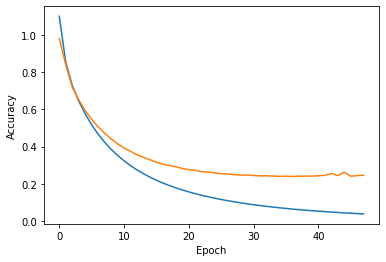

In [17]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


In [ ]:
import cv2
image=cv2.imread("image.jpg")
Image=cv2.resize(image,(100,100))
result=model.predict(Image)
if(np.argmax(result)==0):
  print('Apple')
if(np.argmax(result)==1):
  print('Banana')
if(np.argmax(result)==2):
  print('Lemon')
if(np.argmax(result)==3):
  print('Peach')
if(np.argmax(result)==4):
  print('Pineapple')

In [ ]:

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials
from google.colab import drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
model.save('model.h5')
model_file = drive.CreateFile({'title' : 'model.h5'})                     
model_file.SetContentFile('model.h5')                       
model_file.Upload()
drive.mount('/content/gdrive')

In [ ]:
import torch
model_save_name = 'classifier.pt'
path = F"/content/gdrive/My Drive/ModelData/{model_save_name}" 
torch.save(model, path)